In [ ]:
import numpy as np
file_path='F:/my_code/my_PSPNet/voc_data/SegmentationClassNPY/fdc9bd91-c6d8-4e3d-a319-b7eebab67caf___FAM_B.Msls 4338_final_masked.npy'
data=np.load(file_path)
np.set_printoptions(threshold=np.inf)
print(data)

Mask shape: (256, 256)
Unique values in the mask: [0 1 2]


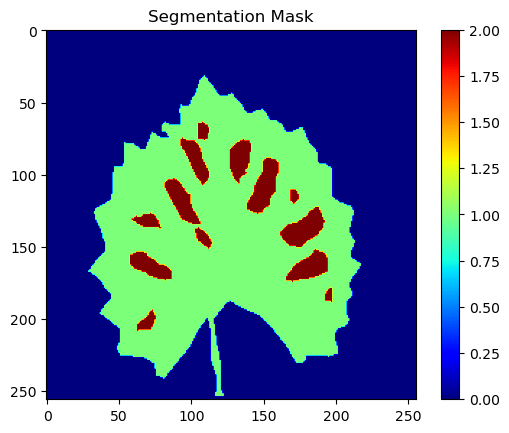

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 加载 NPY 文件
npy_path = r"F:\my_code\my_PSPNet\voc_data\SegmentationClassNPY\fff99912-2321-46f9-9f81-20f0e9296776___FAM_B.Msls 4353_final_masked.npy"
mask = np.load(npy_path)

# 查看标签的形状和唯一值
print("Mask shape:", mask.shape)
print("Unique values in the mask:", np.unique(mask))

# 可视化分割标签
plt.imshow(mask, cmap='jet')  # 使用 'jet' 颜色图来可视化
plt.colorbar()
plt.title("Segmentation Mask")
plt.show()


In [4]:
from PIL import Image
import numpy as np

# 打开标签 PNG 文件
label_image_path = r"F:\my_code\my_PSPNet\voc_data\SegmentationClass\fff99912-2321-46f9-9f81-20f0e92967764353f3d8a8e1-994a-47b5-b07e-352904300152.png"
label_image = Image.open(label_image_path)

# 转换为 numpy 数组
label_mask = np.array(label_image)

# 输出一些信息
print("Label mask shape:", label_mask.shape)
print("Unique values in the label mask:", np.unique(label_mask))


Label mask shape: (332, 332)
Unique values in the label mask: [0 1 2]


In [ ]:
import numpy as np
file_path='F:/my_code/my_PSPNet/voc_data/SegmentationClassNPY/fdc9bd91-c6d8-4e3d-a319-b7eebab67caf___FAM_B.Msls 4338_final_masked.npy'
data=np.load(file_path)
print(data)

In [ ]:
class DatasetChecker:
    def __init__(self, train_file, val_file):
        self.train_file = train_file
        self.val_file = val_file
        self.train_set = self.load_filenames(train_file)
        self.val_set = self.load_filenames(val_file)

    def load_filenames(self, file_path):
        """读取文件名并返回集合"""
        with open(file_path, 'r') as file:
            return set(line.strip() for line in file.readlines())

    def check_overlap(self):
        """检查训练集和验证集之间的重叠"""
        overlap = self.train_set.intersection(self.val_set)
        if overlap:
            print(f"重叠数据有：{overlap}")
        else:
            print("无重叠")

# 使用示例
if __name__ == "__main__":
    train_file = 'F:/my_code/my_PSPNet/voc_data/ImageSets/train.txt'
    val_file = 'F:/my_code/my_PSPNet/voc_data/ImageSets/val.txt'

    checker = DatasetChecker(train_file, val_file)
    checker.check_overlap()

In [1]:
import os
import xml.etree.ElementTree as ET

def count_classes(xml_dir):
    class_counts = {}
    
    for filename in os.listdir(xml_dir):
        if filename.endswith(".xml"):
            tree = ET.parse(os.path.join(xml_dir, filename))
            root = tree.getroot()
            
            # 遍历每个 object 元素
            for obj in root.findall('object'):
                class_name = obj.find('name').text
                if class_name in class_counts:
                    class_counts[class_name] += 1
                else:
                    class_counts[class_name] = 1
    
    return class_counts

# 设置 XML 文件夹路径
xml_folder = r"F:\my_code\my_PSPNet\voc_data\Annotations\xml"

# 计算类别数量
class_counts = count_classes(xml_folder)

# 输出类别数量
print("各类别数量:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")


各类别数量:
class_1: 6193
class_3: 2375
class_2: 3813
